## Softmax Logistic Regression from scratch
  
Create a softmax logistic regression algorithm using only numpy, no Scikit-Learn!  

In [1]:
import numpy as np

Algorithm is run on the petal length and width of of the iris dataset for simplicity

In [8]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = iris["target"]

X_b = np.c_[np.ones([len(X), 1]), X] #Add bias to feature vector

Randomize the dataset and split into sections for validating and testing the model

In [11]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_b)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_b[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_b[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_b[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

Define hot encoding function, test it, then convert labels into encoded versions

In [13]:
def one_hot_encode(labels):
    n = labels.max() + 1 #Assumes labels start from 0
    m = len(labels)
    encoded = np.zeros((m, n))
    encoded[np.arange(m), labels] = 1 #Set binary values in right spots
    return encoded

In [14]:
one_hot_encode(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [16]:
Y_train_one_hot = one_hot_encode(y_train)
Y_valid_one_hot = one_hot_encode(y_valid)
Y_test_one_hot = one_hot_encode(y_test)

Define softmax function and implement gradient descent method with early stopping

In [17]:
def softmax(outputs):
    exponents = np.exp(outputs)
    return exponents / np.sum(exponents, axis=1, keepdims=True)

In [23]:
n_inputs = X_train.shape[1]                  #size of X
n_outputs = len(np.unique(y_train))          #number of classes
eta = 0.1                                    #step size
n_iterations = 40001                          #number of gradient descents
m = len(X_train)                             #number of samples                              
alpha = 0.1                                  #regularization hyperparameter

best_loss = np.infty                         #original loss
epsilon = 1e-7                               #in case probability is 0

Theta = np.random.randn(n_inputs, n_outputs) #parameters for each class to be defined

for iteration in range(n_iterations):
    #Calculate loss
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    
    #Update parameters
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients
    
    #Calculate new loss
    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    
    #Print loss
    if iteration % 500 == 0:
        print(iteration, loss)
    
    #Early stopping if loss does not improve
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 1.4029686863739521
500 0.5399091005011587
1000 0.5173139576880811
1500 0.5102440663584142
2000 0.5074862898578454
2500 0.5063125913074629
3000 0.5057841586543829
3500 0.505534869633146
4000 0.5054118945770771
4500 0.5053484274715387
5000 0.5053141530715213
5500 0.5052948202564818
6000 0.5052834780066788
6500 0.5052765980915821
7000 0.5052723121008242
7500 0.5052695872126548
8000 0.5052678287839825
8500 0.5052666818948875
9000 0.5052659282850728
9500 0.50526543055372
10000 0.5052651006712041
10500 0.5052648815168947
11000 0.5052647356917199
11500 0.5052646385558198
12000 0.5052645738059902
12500 0.5052645306236578
13000 0.5052645018156592
13500 0.5052644825930057
14000 0.5052644697645051
14500 0.5052644612024094
15000 0.5052644554874643
15500 0.5052644516727451
16000 0.5052644491263517
16500 0.5052644474265561
17000 0.505264446291876
17500 0.5052644455344262
18000 0.5052644450287918
18500 0.5052644446912549
19000 0.5052644444659311
19500 0.5052644443155156
20000 0.5052644442151049
205

Test results on validation set

In [24]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9333333333333333

Fancy visualization below!!

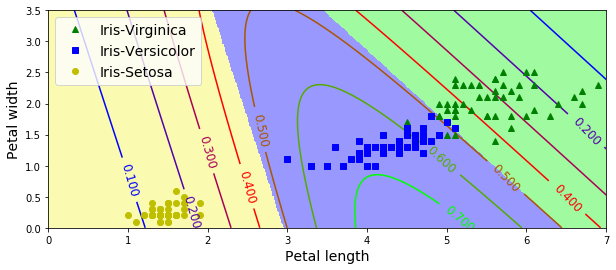

In [52]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#Create X samples throughout entire feature range
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

#Create predictions
logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

#Plot actual samples
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

#Color sections with predictions
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)

#Confidence contour lines for Versicolor predictions
zz1 = Y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

#Labels
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()